# Data Augmentation

Vous le savez, la potentiel des modèles de deep learning est limité par le quantité de données dont on dispose pour entraîner notre modèle. De manière générale, on a besoin d'une énorme quantité de données : les modèles de vision les plus performants sont entraînés sur des milliards d'images et les modèles de NLP (LLM) sur des trillions de tokens. 

Bien souvent, obtenir des données de qualité labelisées est une tâche complexe et surtout couteuse. 

Est ce qu'il ne serait pas possible d'augmenter artificiellement nos données grâce à des transformations ingénieuses ? 

OUI ! C'est possible et c'est ce qu'on appelle la *data augmentation*. Dans cette partie, nous allons regarder différentes méthodes de *data augmentation* pour les images et présenter rapidement les possibilités de *data augmentation* pour le NLP et l'audio.

## Data augmentation pour les images

Les techniques de *data augmentation* présentées dans cette partie ont montré des intêrets pour l'entraînement de modèles de deep learning. En revanche, il faut être prudent car parfois certains types de data augmentation ne sont pas en accord avec notre objectif d'entraînement (mettons que l'on veut détecter les personnes allongées, on va éviter de tourner l'image de 90 degrés).  

Pour introduire les différentes méthodes de *data augmentation*, nous utilisons pytorch et plus particulièrement torchvision qui propose un large choix de techniques de data augmentation. 

Commençons avec notre image de base : 

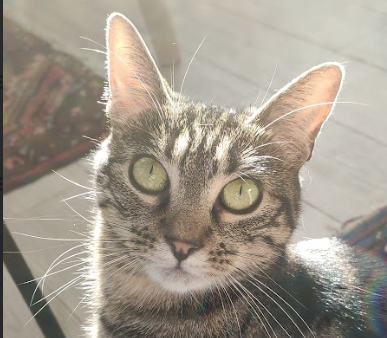

In [1]:
from PIL import Image
image_pil=Image.open("images/tigrou.png")
image_pil

Transformons notre image en tensor torch.

In [2]:
import torchvision.transforms as T 
transform=T.Compose([T.ToTensor(),T.Resize((360,360))])
image=transform(image_pil)[0:3,:,:]

/home/aquilae/anaconda3/envs/dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Inversion horizontale/verticale et rotation

Une première idée pour la data augmentation consiste à appliquer des transformations tel que l'inversion de l'image (horizontalement ou verticalement) ou la rotation de l'image. En effet, un chat à l'envers reste un chat.  
**A considérer** : Si on voulait différencier la classe "chat" et la classe "chat à l'envers", on ne pourrait pas utiliser cette technique. Il faut toujours bien être sûr de ce dont on a besoin. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


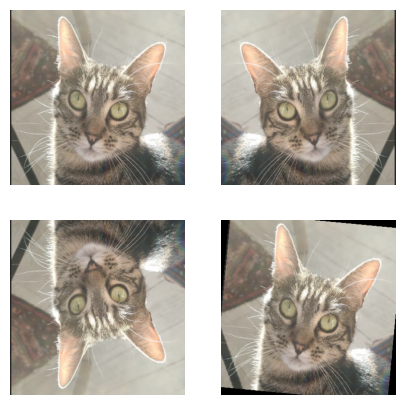

In [3]:
import matplotlib.pyplot as plt

horiz_flip=T.Compose([T.RandomHorizontalFlip(p=1)])
image_horiz_flip=horiz_flip(image)
vert_flip=T.Compose([T.RandomVerticalFlip(p=1)])
image_vert_flip=vert_flip(image)
rot=T.Compose([T.RandomRotation(degrees=90)])
image_rot=rot(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_horiz_flip.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_vert_flip.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_rot.permute(1,2,0))
plt.axis("off")
plt.show()

### Image cropping

Une autre technique consiste à *crop* une partie de l'image et utiliser ce *crop* comme image d'entrée. Il y a la possibilité de *CenterCrop* (un *crop* au centre) ou *RandomCrop* (*crop* aléatoire dans l'image).   
**A considérer** : Avec cette méthode, il faut faire attention à ce que l'objet soit bien présent dans notre *crop*. Si on choisit une valeur de *crop* trop petite ou que l'objet n'occupe pas une place assez importante dans l'image, ce type de *data augmentation* peut être détrimentaire (voir dernière image).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


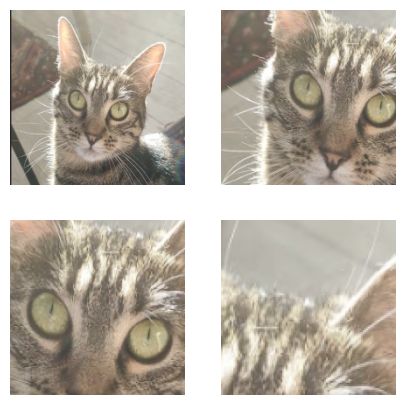

In [4]:
crop=T.Compose([T.RandomCrop(200)])
image_crop=crop(image)
center_crop=T.Compose([T.CenterCrop(150)])
image_center_crop=center_crop(image)

crop_small=T.Compose([T.RandomCrop(100)])
image_crop_small=crop_small(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_crop.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_center_crop.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_crop_small.permute(1,2,0))
plt.axis("off")
plt.show()

### Contraste, luminosité, saturation et teinte

On peut également choisir de modifier les valeurs de luminosité (*brightness*), contraste (*contrast*), saturation (*saturation*) et teinte (*hue*) grâce à la transformation [ColorJitter](https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


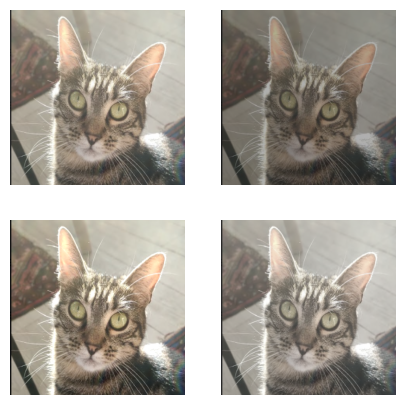

In [87]:
bright=T.Compose([T.ColorJitter(brightness=0.8)])
image_bright=bright(image)
contr=T.Compose([T.ColorJitter(contrast=0.8)])
image_contr=contr(image)

satur=T.Compose([T.ColorJitter(saturation=0.8)])
image_satur=satur(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_bright.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_contr.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_satur.permute(1,2,0))
plt.axis("off")
plt.show()

### Autres transformations

Beaucoup d'autres transformations sont possible. On peut supprimer une partie de l'image. On peut également ajouter un *padding* autour de l'image ou *solarize* l'image. Il est aussi possible de définir une transformation affine précise de ce que l'on va appliquer comme transformation à l'image 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


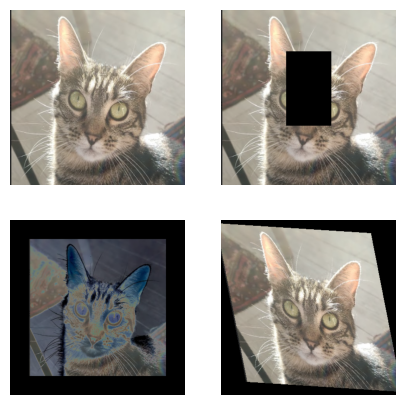

In [85]:
erase=T.Compose([T.RandomErasing(p=1)])
image_erase=erase(image)
solar=T.Compose([T.Pad(50),T.RandomSolarize(0.5,p=1)])
image_solar=solar(image)

affin=T.Compose([T.RandomAffine(degrees=30,scale=(0.8,1.2),shear=30)])
image_affin=affin(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_erase.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_solar.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_affin.permute(1,2,0))
plt.axis("off")
plt.show()

La data augmentation est une technique très intéressante permettant d'augmenter articifiellement les données d'entraînement. Cela conduit à la possibilité d'entraîner de plus gros modèles sans *overfitting*. En pratique, il est très souvent intéressant d'en inclure dans l'entraînement de son réseau de neurones mais il faut quand même faire attention à ne pas faire n'importe quoi.   
Je vous invite à tester votre *data augmentation* sur quelques éléments de votre dataset pour voir si rien ne vous choque. 

**Note** : Il existe d'autres méthodes de *data augmentation* notamment l'ajout de bruit sur l'image. Vous pouvez retrouver la liste des transformations possible dans la [documentation pytorch](https://pytorch.org/vision/stable/transforms.html).

## Data augmentation pour le texte

On peut également faire de la data augmentation en NLP. Voici une liste de ce qu'il est possible de faire : 
- On peut changer aléatoirement la position de certains mots dans une phrase (rend le modèle robuste mais potentiellement dangereux à faire)
- On peut remplacer certains mots par un de leurs synonymes
- On peut paraphraser
- On peut ajouter ou supprimer des mots au hasard dans la phrase  

Ces techniques ne sont pas adaptées à tous les problèmes de NLP et il faut faire bien attention en les utilisant.  

**Note** : Avec l'arrivée des LLM, il est souvent possible de *fine-tune* notre modèle de manière efficace, même avec très peu de données, ce qui diminue le recours à la *data augmentation* en NLP.

## Data augmentation pour l'audio

Dans le domaine de l'audio, il est aussi parfois utile d'utiliser de la *data augmentation*. Voici une liste de certaines techniques pour augmenter vos données artificiellement en audio :  
- Ajout de bruit dans l'audio (gaussien ou aléatoire) pour augmenter la performance du modèle dans des situations complexes
- Décalage de l'enregistrement 
- Changement de la vitesse de l'enregistrement 
- Changer la hauteur du son (plus aigu ou plus grave)